In [2]:
import pandas as pd
import numpy as np

import datetime
from datetime import timedelta

import requests
from urllib.parse import urlencode
import json

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from scipy.stats import bootstrap
import pingouin as pg

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

# –ó–ê–î–ê–ù–ò–ï 1

<div class="alert alert-block alert-info">
Retention ‚Äì –æ–¥–∏–Ω –∏–∑ —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –≤ –∫–æ–º–ø–∞–Ω–∏–∏. <br>–í–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äì –Ω–∞–ø–∏—Å–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç —Å—á–∏—Ç–∞—Ç—å retention –∏–≥—Ä–æ–∫–æ–≤ (–ø–æ –¥–Ω—è–º –æ—Ç –¥–∞—Ç—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∏–≥—Ä–æ–∫–∞). </div>



In [3]:
# –∑–∞–≥—Ä—É–∂–∞–µ–º —Ç–∞–±–ª–∏—Ü—É —Å –¥–∞–Ω–Ω—ã–º–∏ –æ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏, –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—è ;
df_reg = pd.read_csv('../shared/problem1-reg_data.csv', encoding='windows=1251', sep=';')
df_reg.head()

reg_ts  uid
0  911382223    1
1  932683089    2
2  947802447    3
3  959523541    4
4  969103313    5

In [4]:
# –∑–∞–≥—Ä—É–∂–∞–µ–º —Ç–∞–±–ª–∏—Ü—É —Å –¥–∞–Ω–Ω—ã–º–∏ –æ –∑–∞—Ö–æ–¥–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—è ;
df_auth = pd.read_csv('../shared/problem1-auth_data.csv', encoding='windows=1251', sep=';')
df_auth.head()

auth_ts  uid
0  911382223    1
1  932683089    2
2  932921206    2
3  933393015    2
4  933875379    2

#### –ü—Ä–æ–≤–µ–¥–µ–º –¥–ª—è –Ω–∞—á–∞–ª–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –∏ –æ–±—â–∏–π –∞–Ω–∞–ª–∏–∑ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö

In [5]:
df_reg.shape

(1000000, 2)

In [6]:
df_auth.shape

(9601013, 2)

In [7]:
df_auth.uid.nunique()
# –ø—Ä–æ–≤–µ—Ä–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–∞–ø–∏—Å–∏, –∏—Ö —Å—Ç–æ–ª—å–∫–æ –∂–µ —Å–∫–æ–ª—å–∫–æ –∏ –≤ —Ç–∞–±–ª–∏—Ü–µ —Å —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–µ–π, –≤—Å—ë –æ–∫

1000000

In [8]:
df_reg.isnull().sum()
# –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç

reg_ts    0
uid       0
dtype: int64

In [9]:
df_auth.isnull().sum()
# –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç

auth_ts    0
uid        0
dtype: int64

In [10]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö
df_reg.dtypes 

reg_ts    int64
uid       int64
dtype: object

In [11]:
df_auth.dtypes

auth_ts    int64
uid        int64
dtype: object

In [12]:
df_reg.duplicated().sum()
# –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã

0

In [13]:
df_auth.duplicated().sum()
# –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã

0

—Å—É–¥—è –ø–æ –≤—Å–µ–º—É —É –Ω–∞—Å –≤ —Ç–∞–±–ª–∏—Ü–∞—Ö –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Ñ–æ—Ä–º–∞—Ç –≤—Ä–µ–º–µ–Ω–∏ ts
–ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –µ–≥–æ –≤ –æ–±—ã—á–Ω–æ–µ –≤—Ä–µ–º—è

In [14]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ reg_ts –≤ —Ñ–æ—Ä–º–∞—Ç –≤—Ä–µ–º–µ–Ω–∏
df_reg['reg_ts'] = df_reg['reg_ts'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df_reg.head()

reg_ts  uid
0 1998-11-18 12:43:43    1
1 1999-07-23 01:38:09    2
2 2000-01-14 01:27:27    3
3 2000-05-28 17:19:01    4
4 2000-09-16 14:21:53    5

In [15]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ reg_ts –≤ —Ñ–æ—Ä–º–∞—Ç –≤—Ä–µ–º–µ–Ω–∏
df_auth['auth_ts'] = df_auth['auth_ts'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df_auth.head()

auth_ts  uid
0 1998-11-18 12:43:43    1
1 1999-07-23 01:38:09    2
2 1999-07-25 19:46:46    2
3 1999-07-31 06:50:15    2
4 1999-08-05 20:49:39    2

### –î–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ Retention –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–æ–≥–æ—Ä—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑

<div class="alert alert-danger"><br>
–ü–µ—Ä–µ–¥ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–µ–º –∫–æ–≥–æ—Ä—Ç–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç —á–µ—Ç—ã—Ä–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞:<br>

–ü—Ä–∏–∑–Ω–∞–∫ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –∫–æ–≥–æ—Ä—Ç—ã ‚Äî –¥–µ–π—Å—Ç–≤–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç –ª—é–¥–µ–π –≤ –≥—Ä—É–ø–ø—É:<br>
–ø–µ—Ä–≤—ã–π –≤–∏–∑–∏—Ç, –ø–æ–∫—É–ø–∫–∞, —É—Å—Ç–∞–Ω–æ–≤–∫–∞, —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è –∏ —Ç.–ø.<br>
–£ –Ω–∞—Å —ç—Ç–æ –±—É–¥–µ—Ç –¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏<br>

–†–∞–∑–º–µ—Ä –∫–æ–≥–æ—Ä—Ç—ã ‚Äî –≤—Ä–µ–º–µ–Ω–Ω–æ–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: –¥–µ–Ω—å, –Ω–µ–¥–µ–ª—è, –º–µ—Å—è—Ü.<br>
–£ –Ω–∞—Å —ç—Ç–æ 1 –¥–µ–Ω—å –ø–æ —É—Å–ª–æ–≤–∏—è–º –∑–∞–¥–∞–Ω–∏—è<br>

–û—Ç—á–µ—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥ ‚Äî –≤—Ä–µ–º—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –ø–æ–≤–µ–¥–µ–Ω–∏—è –≥—Ä—É–ø–ø.<br>
–î–∞–Ω–Ω—ã –ø–µ—Ä–∏–æ–¥ –±—É–¥–µ—Ç –ø—Ä–µ–¥–ª–∞–≥–∞—Ç—å—Å—è –≤—ã–±—Ä–∞—Ç—å (–¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∏ –∫–æ–Ω–µ—Ü –ø–µ—Ä–∏–æ–¥–∞)<br>

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º—ã–π –∫–ª—é—á–µ–≤–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å: ROI, Retention Rate, LTV –∏ —Ç.–¥.<br>
–£ –Ω–∞—Å —ç—Ç–æ Retention Rate - —Ç.–µ. –∫–æ–≥–¥–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å —Å–æ–≤–µ—Ä—à–∏–ª —Å–≤–æ–π —Å–ª–µ–¥—É—é—â–∏–π –∑–∞—Ö–æ–¥ (–∞–≤—Ç–æ—Ä–∏–∑–æ–≤–∞–ª—Å—è) –ø–æ—Å–ª–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏<br>
</div>

In [16]:
# —É–±–µ—Ä–µ–º –ª–∏—à–Ω–µ–µ –∏–∑ –¥–∞—Ç
df_reg['reg_ts'] = df_reg['reg_ts'].dt.strftime('%Y-%m-%d')
df_reg.head()

reg_ts  uid
0  1998-11-18    1
1  1999-07-23    2
2  2000-01-14    3
3  2000-05-28    4
4  2000-09-16    5

In [17]:
df_auth['auth_ts'] = df_auth['auth_ts'].dt.strftime('%Y-%m-%d')
df_auth.head()

auth_ts  uid
0  1998-11-18    1
1  1999-07-23    2
2  1999-07-25    2
3  1999-07-31    2
4  1999-08-05    2

In [18]:
# –ø–æ—Å–ª–µ–¥–Ω—è—è –¥–∞—Ç–∞ –≤ —Ç–∞–±–ª–∏—Ü–µ —Å —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏—è–º–∏ 
df_reg.reg_ts.max()

'2020-09-23'

In [19]:
# –¥–ª—è –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–æ–≥–æ—Ä—Ç–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –æ—Å—Ç–∞–≤–∏–º –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü, —á—Ç–æ–±—ã —Å–æ–∫—Ä–∞—Ç–∏—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏—è
df_test_reg =  df_reg.query('reg_ts >= "2020-09-01"')
df_test_reg.head()

reg_ts      uid
963262  2020-09-01  1069810
963263  2020-09-01  1069811
963264  2020-09-01  1069812
963265  2020-09-01  1069813
963266  2020-09-01  1069814

In [20]:
df_test_auth =  df_auth.query('auth_ts >= "2020-09-01"')
df_test_auth.head()

auth_ts      uid
9247286  2020-09-01   737562
9247287  2020-09-01   376336
9247288  2020-09-01  1069810
9247289  2020-09-01    13791
9247290  2020-09-01   807646

In [21]:
# –æ–±—ä–µ–¥–∏–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—ã
retention_table = pd.merge(df_test_reg, df_test_auth, on='uid') 
retention_table.head()

reg_ts      uid     auth_ts
0  2020-09-01  1069810  2020-09-01
1  2020-09-01  1069810  2020-09-02
2  2020-09-01  1069810  2020-09-04
3  2020-09-01  1069811  2020-09-01
4  2020-09-01  1069811  2020-09-07

In [22]:
# –æ—Å—Ç–æ—Ä—Ç–∏—Ä—É–µ–º –≤ –ø–æ—Ä—è–¥–∫–µ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—è 
retention_table.sort_values(['reg_ts', 'uid'])
retention_table

reg_ts      uid     auth_ts
0      2020-09-01  1069810  2020-09-01
1      2020-09-01  1069810  2020-09-02
2      2020-09-01  1069810  2020-09-04
3      2020-09-01  1069811  2020-09-01
4      2020-09-01  1069811  2020-09-07
...           ...      ...         ...
56218  2020-09-23  1110618  2020-09-23
56219  2020-09-23  1110619  2020-09-23
56220  2020-09-23  1110620  2020-09-23
56221  2020-09-23  1110621  2020-09-23
56222  2020-09-23  1110622  2020-09-23

[56223 rows x 3 columns]

In [23]:
# –ø—Ä–æ–≤–µ—Ä–∏–º —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö 
retention_table.dtypes

reg_ts     object
uid         int64
auth_ts    object
dtype: object

In [24]:
# –ó–∞–¥–∞–µ–º –¥–∞—Ç—É –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ retention, –Ω–∞–ø—Ä–∏–º–µ—Ä 10 —Å–µ–Ω—Ç—è–±—Ä—è 2020 –≥–æ–¥–∞
start_period = "2020-09-10"
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å—Ç—Ä–æ–∫–∏ –≤ –æ–±—ä–µ–∫—Ç datetime
start_period_dt = datetime.datetime.strptime(start_period, '%Y-%m-%d')
# –§–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞—Ç—ã –≤ –Ω—É–∂–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç
start_period_formatted = start_period_dt.strftime('%Y-%m-%d')
# –í–æ–∑—å–º–µ–º –ø–µ—Ä–∏–æ–¥ –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ retention –≤ 10 –¥–Ω–µ–π
end_period = "2020-09-20"
end_period_dt = datetime.datetime.strptime(end_period, '%Y-%m-%d')
end_period_formatted = end_period_dt.strftime('%Y-%m-%d')

In [25]:
# –æ—Å—Ç–∞–≤–ª—è–µ–º –Ω—É–∂–Ω—ã–µ –Ω–∞–º –¥–∞–Ω–Ω—ã–µ 
retention_table = retention_table[(retention_table['reg_ts'] >= start_period_formatted) & (retention_table['reg_ts'] <= end_period_formatted)]
retention_table

reg_ts      uid     auth_ts
27126  2020-09-10  1085739  2020-09-10
27127  2020-09-10  1085740  2020-09-10
27128  2020-09-10  1085741  2020-09-10
27129  2020-09-10  1085742  2020-09-10
27130  2020-09-10  1085744  2020-09-10
...           ...      ...         ...
51582  2020-09-20  1105556  2020-09-20
51583  2020-09-20  1105556  2020-09-23
51584  2020-09-20  1105557  2020-09-20
51585  2020-09-20  1105558  2020-09-20
51586  2020-09-20  1105559  2020-09-20

[24461 rows x 3 columns]

In [26]:
# –≥—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–∞—Ç–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∏ –¥–∞—Ç–µ –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏, 
# —Å—á–∏—Ç–∞–µ–º —á–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π ( –æ–¥–Ω–∞ –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è)
# —Ç.–µ. —Å–º–æ—Ç—Ä–∏–º  –¥–ª—è –∫–∞–∂–¥–æ–π –¥–∞—Ç—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –≤ –∫–∞–∫–∏–µ –¥–Ω–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –¥–µ–ª–∞–ª–∏ –∑–∞—Ö–æ–¥—ã –≤ –∏–≥—Ä—É –∏ —Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –±—ã–ª–æ
retention_table = retention_table.groupby(['reg_ts','auth_ts'],  as_index=False)\
                                   .agg({'uid':'nunique'})
retention_table

reg_ts     auth_ts   uid
0   2020-09-10  2020-09-10  1609
1   2020-09-10  2020-09-11    29
2   2020-09-10  2020-09-12    71
3   2020-09-10  2020-09-13    74
4   2020-09-10  2020-09-14    70
..         ...         ...   ...
94  2020-09-19  2020-09-23    67
95  2020-09-20  2020-09-20  1636
96  2020-09-20  2020-09-21    38
97  2020-09-20  2020-09-22    71
98  2020-09-20  2020-09-23    57

[99 rows x 3 columns]

In [27]:
# –ø–æ—Å—á–∏—Ç–∞–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç—Ä–æ–∫–∏ –ø–µ—Ä–∏–æ–¥ –∫–æ–≥–æ—Ä—Ç—ã - —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π –∏ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–µ–π
retention_table['cogort_period'] = (pd.to_datetime(retention_table['auth_ts']) - pd.to_datetime(retention_table['reg_ts'])).dt.days
retention_table


reg_ts     auth_ts   uid  cogort_period
0   2020-09-10  2020-09-10  1609              0
1   2020-09-10  2020-09-11    29              1
2   2020-09-10  2020-09-12    71              2
3   2020-09-10  2020-09-13    74              3
4   2020-09-10  2020-09-14    70              4
..         ...         ...   ...            ...
94  2020-09-19  2020-09-23    67              4
95  2020-09-20  2020-09-20  1636              0
96  2020-09-20  2020-09-21    38              1
97  2020-09-20  2020-09-22    71              2
98  2020-09-20  2020-09-23    57              3

[99 rows x 4 columns]

In [28]:
# —Ç–∞–∫–∂–µ —Å–¥–µ–ª–∞–µ–º –ø–µ—Ä–∏–æ–¥ –∫–æ–≥–æ—Ä—Ç—ã –Ω–µ –±–æ–ª—å—à–µ, —á–µ–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã–π –ø–µ—Ä–∏–æ–¥ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–π —é–∑–µ—Ä–æ–≤ (–ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –¥–ª—è —Ä–æ–≤–Ω–æ–π —Ç–∞–±–ª–∏—á–∫–∏)
retention_table = retention_table[retention_table['cogort_period'] <= (end_period_dt - start_period_dt).days]
retention_table


reg_ts     auth_ts   uid  cogort_period
0   2020-09-10  2020-09-10  1609              0
1   2020-09-10  2020-09-11    29              1
2   2020-09-10  2020-09-12    71              2
3   2020-09-10  2020-09-13    74              3
4   2020-09-10  2020-09-14    70              4
..         ...         ...   ...            ...
94  2020-09-19  2020-09-23    67              4
95  2020-09-20  2020-09-20  1636              0
96  2020-09-20  2020-09-21    38              1
97  2020-09-20  2020-09-22    71              2
98  2020-09-20  2020-09-23    57              3

[93 rows x 4 columns]

In [29]:
# –ø–µ—Ä–µ–≤–µ—Ä–Ω–µ–º –Ω–∞—à—É —Ç–∞–±–ª–∏—Ü—É
pivot_retention_table = retention_table.pivot(index='reg_ts', columns='cogort_period', values='uid')
pivot_retention_table

cogort_period      0     1     2     3     4      5      6      7     8   \
reg_ts                                                                     
2020-09-10     1609.0  29.0  71.0  74.0  70.0  112.0   93.0  110.0  80.0   
2020-09-11     1611.0  23.0  64.0  63.0  99.0  102.0  111.0  101.0  79.0   
2020-09-12     1614.0  29.0  66.0  64.0  65.0  102.0  111.0   93.0  75.0   
2020-09-13     1617.0  36.0  72.0  64.0  81.0  100.0  107.0   84.0  78.0   
2020-09-14     1620.0  32.0  63.0  69.0  94.0  102.0  111.0  111.0  72.0   
2020-09-15     1622.0  37.0  65.0  73.0  98.0   93.0  113.0   87.0  46.0   
2020-09-16     1625.0  34.0  67.0  72.0  81.0   99.0  125.0   65.0   NaN   
2020-09-17     1627.0  27.0  67.0  71.0  96.0  101.0   90.0    NaN   NaN   
2020-09-18     1630.0  35.0  69.0  74.0  76.0   73.0    NaN    NaN   NaN   
2020-09-19     1633.0  30.0  59.0  77.0  67.0    NaN    NaN    NaN   NaN   
2020-09-20     1636.0  38.0  71.0  57.0   NaN    NaN    NaN    NaN   NaN   

cogort_period    9     10  
reg_ts                     
2020-09-10     66.0  98.0  
2020-09-11     63.0  90.0  
2020-09-12     83.0  84.0  
2020-09-13     81.0  72.0  
2020-09-14     55.0   NaN  
2020-09-15      NaN   NaN  
2020-09-16      NaN   NaN  
2020-09-17      NaN   NaN  
2020-09-18      NaN   NaN  
2020-09-19      NaN   NaN  
2020-09-20      NaN   NaN

In [30]:
# –¥–µ–ª–∏–º –≤—Å–µ —Å—Ç–æ–ª–±—Ü—ã –Ω–∞ –ø–µ—Ä–≤—ã–π, —á—Ç–æ–±—ã –ø–æ—á–∏—Ç–∞—Ç—å –ø—Ä–æ—Ü–µ–Ω—Ç
pivot_retention_table = pivot_retention_table.div(pivot_retention_table[pivot_retention_table.columns[0]], axis = 0) 
pivot_retention_table

cogort_period   0         1         2         3         4         5   \
reg_ts                                                                 
2020-09-10     1.0  0.018024  0.044127  0.045991  0.043505  0.069608   
2020-09-11     1.0  0.014277  0.039727  0.039106  0.061453  0.063315   
2020-09-12     1.0  0.017968  0.040892  0.039653  0.040273  0.063197   
2020-09-13     1.0  0.022263  0.044527  0.039579  0.050093  0.061843   
2020-09-14     1.0  0.019753  0.038889  0.042593  0.058025  0.062963   
2020-09-15     1.0  0.022811  0.040074  0.045006  0.060419  0.057337   
2020-09-16     1.0  0.020923  0.041231  0.044308  0.049846  0.060923   
2020-09-17     1.0  0.016595  0.041180  0.043639  0.059004  0.062077   
2020-09-18     1.0  0.021472  0.042331  0.045399  0.046626  0.044785   
2020-09-19     1.0  0.018371  0.036130  0.047152  0.041029       NaN   
2020-09-20     1.0  0.023227  0.043399  0.034841       NaN       NaN   

cogort_period        6         7         8         9         10  
reg_ts                                                           
2020-09-10     0.057800  0.068365  0.049720  0.041019  0.060907  
2020-09-11     0.068901  0.062694  0.049038  0.039106  0.055866  
2020-09-12     0.068773  0.057621  0.046468  0.051425  0.052045  
2020-09-13     0.066172  0.051948  0.048237  0.050093  0.044527  
2020-09-14     0.068519  0.068519  0.044444  0.033951       NaN  
2020-09-15     0.069667  0.053637  0.028360       NaN       NaN  
2020-09-16     0.076923  0.040000       NaN       NaN       NaN  
2020-09-17     0.055317       NaN       NaN       NaN       NaN  
2020-09-18          NaN       NaN       NaN       NaN       NaN  
2020-09-19          NaN       NaN       NaN       NaN       NaN  
2020-09-20          NaN       NaN       NaN       NaN       NaN

In [31]:
# –ö—Ä–∞—Å–∏–≤–æ –æ—Ñ–æ—Ä–º–ª—è–µ–º
ur_style = (pivot_retention_table
            .style
            .set_caption('User retention by cohort')  # –¥–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å—å
            .background_gradient(cmap='YlGn')  # —Ä–∞—Å–∫—Ä–∞—à–∏–≤–∞–µ–º —è—á–µ–π–∫–∏ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º
            .highlight_null('white')  # –¥–µ–ª–∞–µ–º –±–µ–ª—ã–π —Ñ–æ–Ω –¥–ª—è –∑–Ω–∞—á–µ–Ω–∏–π NaN
            .format("{:.2%}", na_rep=""))  # —á–∏—Å–ª–∞ —Ñ–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –∫–∞–∫ –ø—Ä–æ—Ü–µ–Ω—Ç—ã, NaN –∑–∞–º–µ–Ω—è–µ–º –Ω–∞ –ø—É—Å—Ç–æ—Ç—É     
ur_style

### —Ç–µ–ø–µ—Ä—å –ø—Ä–æ—Å—Ç–æ —Å–≥—Ä—É–ø–ø–∏—Ä—É–µ–º –≤–µ—Å—å –Ω–∞—à –∫–æ–¥ –≤ —Ñ—É–Ω–∫—Ü–∏—é

In [32]:
def retention(start_period, end_period):
    df_reg = pd.read_csv('../shared/problem1-reg_data.csv', encoding='windows=1251', sep=';')
    df_auth = pd.read_csv('../shared/problem1-auth_data.csv', encoding='windows=1251', sep=';')
    df_reg['reg_ts'] = df_reg['reg_ts'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    df_auth['auth_ts'] = df_auth['auth_ts'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    df_reg['reg_ts'] = df_reg['reg_ts'].dt.strftime('%Y-%m-%d')
    df_auth['auth_ts'] = df_auth['auth_ts'].dt.strftime('%Y-%m-%d')
    retention_table = pd.merge(df_reg, df_auth, on='uid')
    retention_table.sort_values(['reg_ts', 'uid'])
    start_period_dt = datetime.datetime.strptime(start_period, '%Y-%m-%d')
    start_period_formatted = start_period_dt.strftime('%Y-%m-%d')
    end_period_dt = datetime.datetime.strptime(end_period, '%Y-%m-%d')
    end_period_formatted = end_period_dt.strftime('%Y-%m-%d')
    retention_table = retention_table[(retention_table['reg_ts'] >= start_period_formatted) & \
                                       (retention_table['reg_ts'] <= end_period_formatted)]
    retention_table = retention_table.groupby(['reg_ts','auth_ts'],  as_index=False)\
                                       .agg({'uid':'nunique'})
    retention_table['–¥–µ–Ω—å –≤–æ–∑–≤—Ä–∞—Ç–∞'] = (pd.to_datetime(retention_table['auth_ts']) - \
                                         pd.to_datetime(retention_table['reg_ts'])).dt.days
    retention_table = retention_table[retention_table['–¥–µ–Ω—å –≤–æ–∑–≤—Ä–∞—Ç–∞'] <= (end_period_dt - start_period_dt).days]
    pivot_retention_table = retention_table.pivot(index='reg_ts', columns='–¥–µ–Ω—å –≤–æ–∑–≤—Ä–∞—Ç–∞', values='uid')     
    pivot_retention_table = pivot_retention_table.div(pivot_retention_table[pivot_retention_table.columns[0]], axis = 0)
    pivot_retention_table.index.name = '–¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏'
    ur_style = (pivot_retention_table
                .style
                .set_caption('<h1>Retention –∏–≥—Ä–æ–∫–æ–≤ –ø–æ –¥–∞—Ç–∞–º</h2>')
                .background_gradient(cmap='YlGn')
                .highlight_null('white')
                .format("{:.2%}", na_rep=""))
    return ur_style

<div class ="alert alert-success">—Ç–µ—Å—Ç–∏—Ä—É–µ–º</div> 

In [33]:
# retention('–¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏', '–¥–∞—Ç–∞ –æ–∫–æ–Ω—á–∞–Ω–∏—è –ø–µ—Ä–∏–æ–¥–∞')
retention('2018-04-07', '2018-04-19')

# –ó–ê–î–ê–ù–ò–ï 2

<div class="alert alert-block alert-info">
–ò–º–µ—é—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã A/B —Ç–µ—Å—Ç–∞, –≤ –∫–æ—Ç–æ—Ä–æ–º –¥–≤—É–º –≥—Ä—É–ø–ø–∞–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø—Ä–µ–¥–ª–∞–≥–∞–ª–∏—Å—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –Ω–∞–±–æ—Ä—ã –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π. <br> –ò–∑–≤–µ—Å—Ç–Ω–æ, —á—Ç–æ ARPU –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ –≤—ã—à–µ –Ω–∞ 5%, —á–µ–º –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π. <br> –ü—Ä–∏ —ç—Ç–æ–º –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ 1928 –∏–≥—Ä–æ–∫–æ–≤ –∏–∑ 202103 –æ–∫–∞–∑–∞–ª–∏—Å—å –ø–ª–∞—Ç—è—â–∏–º–∏, –∞ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π ‚Äì 1805 –∏–∑ 202667.<br>
–ö–∞–∫–æ–π –Ω–∞–±–æ—Ä –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –ª—É—á—à–∏–º? <br> 
–ö–∞–∫–∏–µ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ç–æ–∏—Ç –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –¥–ª—è –ø—Ä–∏–Ω—è—Ç–∏—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –∏ –∫–∞–∫?
    <div>

In [34]:
# —Å—Å—ã–ª–∫–∞ –Ω–∞ —è–Ω–¥–µ–∫—Å –¥–∏—Å–∫
public_path_1 = 'https://disk.yandex.ru/d/SOkIsD5A8xlI7Q'  

In [35]:
# –ü–æ–ª—É—á–∞–µ–º –∑–∞–≥—Ä—É–∑–æ—á–Ω—É—é —Å—Å—ã–ª–∫—É
def get_yandex(public_path):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_path))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

df_AB = pd.read_csv(get_yandex(public_path_1), encoding='windows=1251', sep=';')
df_AB.head()

user_id  revenue testgroup
0        1        0         b
1        2        0         a
2        3        0         a
3        4        0         b
4        5        0         b

#### –ü—Ä–æ–≤–µ–¥–µ–º –¥–ª—è –Ω–∞—á–∞–ª–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –∏ –æ–±—â–∏–π –∞–Ω–∞–ª–∏–∑ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö

In [36]:
df_AB.shape
# 404770 —Å—Ç—Ä–æ—á–µ–∫, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É–µ—Ç 202103+202667 –∫–æ–ª-–≤—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑ –∑–∞–¥–∞–Ω–∏—è

(404770, 3)

In [37]:
df_AB.dtypes 
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö

user_id       int64
revenue       int64
testgroup    object
dtype: object

In [38]:
df_AB.isnull().sum()
# –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç

user_id      0
revenue      0
testgroup    0
dtype: int64

In [39]:
df_AB.duplicated().sum()
# –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã

0

In [40]:
df_AB.query('testgroup == "a"').user_id.nunique()
# –∫–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ –≥—Ä—É–ø–ø–µ "–∞"

202103

In [41]:
df_AB.query('testgroup == "b"').user_id.nunique()
# –∫–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ –≥—Ä—É–ø–ø–µ "b"

202667

<div class = "alert-success">–¥–µ–ª–∞–µ–º –≤—ã–≤–æ–¥, —á—Ç–æ –≥—Ä—É–ø–ø–∞ –∞ - –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–∞—è, –∞ –≥—Ä—É–ø–ø–∞ b - —Ç–µ—Å—Ç–æ–≤–∞—è <br>
—Å–¥–µ–ª–∞–µ–º –¥–ª—è –∫–∞–∂–¥–æ–π —Å–≤–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º</div>

In [42]:
df_control = df_AB.query('testgroup == "a"')
df_control.head()

user_id  revenue testgroup
1         2        0         a
2         3        0         a
9        10        0         a
10       11        0         a
11       12        0         a

In [43]:
df_test = df_AB.query('testgroup == "b"')
df_test.head()

user_id  revenue testgroup
0        1        0         b
3        4        0         b
4        5        0         b
5        6        0         b
6        7        0         b

### –î–ª—è –æ—Ü–µ–Ω–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ç–µ—Å—Ç–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏: <br>
**–ö–æ–Ω–≤–µ—Ä—Å–∏—è (conversion rate, CR)** ‚Äî –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —á–∏—Å–ª–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π,  –∫–æ—Ç–æ—Ä—ã–µ –≤—ã–ø–æ–ª–Ω–∏–ª–∏ –∫–∞–∫–æ–µ-–ª–∏–±–æ —Ü–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ –∫ –æ–±—â–µ–º—É —á–∏—Å–ª—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. <br>
**ARPPU (Average revenue per paying user)** - –°—Ä–µ–¥–Ω–∏–π –¥–æ—Ö–æ–¥ –Ω–∞ –ø–ª–∞—Ç—è—â–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è <br>
**ARPU (Average revenue per user)** - C—Ä–µ–¥–Ω–∏–π –¥–æ—Ö–æ–¥ —Å –ø—Ä–∏–≤–ª–µ—á—ë–Ω–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è <br>


In [44]:
df_control_CR = df_control.query('revenue != 0').user_id.nunique() / df_control.user_id.nunique()*100
df_control_CR

0.9539690157988748

In [45]:
df_test_CR = df_test.query('revenue != 0').user_id.nunique() / df_test.user_id.nunique()*100
df_test_CR

0.8906235351586593

In [46]:
df_control_CR*100/df_test_CR

107.11248671740196

<div class = "alert-success"> –í –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ –∫–æ–Ω–≤–µ—Ä—Å–∏—è –≤ –ø–æ–∫—É–ø–∞—Ç–µ–ª—è –±–æ–ª—å—à–µ –Ω–∞ 7,11% </div>

In [47]:
df_control_ARPU = df_control.revenue.sum() / df_control.user_id.nunique()
df_control_ARPU

25.413719736965806

In [48]:
df_test_ARPU = df_test.revenue.sum() / df_test.user_id.nunique()
df_test_ARPU

26.75128659327863

In [49]:
df_test_ARPU*100/df_control_ARPU

105.2631683600699

<div class = "alert-success">ARPU –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ –±–æ–ª—å—à–µ –Ω–∞ 5,26% <br> 
*–∫–∞–∫ –∏ –±—ã–ª–æ —É–∫–∞–∑–∞–Ω–æ –≤ –∑–∞–¥–∞–Ω–∏–∏</div>

In [50]:
df_control_ARPPU = df_control.revenue.sum() / df_control.query('revenue != 0').user_id.nunique()
df_control_ARPPU

2663.9984439834025

In [51]:
df_test_ARPPU = df_test.revenue.sum() / df_test.query('revenue != 0').user_id.nunique()
df_test_ARPPU

3003.6581717451522

In [52]:
df_test_ARPPU*100/df_control_ARPPU

112.74999722799635

<div class = "alert-success">ARPPU –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ –±–æ–ª—å—à–µ –Ω–∞ 12.75%</div>

–í —É—Å–ª–æ–≤–∏—è—Ö –Ω–µ —Å–∫–∞–∑–∞–Ω–æ –æ –∫–∞–∫–∏—Ö —Å—É–º–º–∞—Ö –∏–¥–µ—Ç —Ä–µ—á—å <br>
–ï—Å–ª–∏ —ç—Ç–æ –º–∏–ª–ª–∏–æ–Ω—ã, —Ç.–∫. —Ä–∞–∑–Ω–∏—Ü–∞ –±—É–¥–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è <br>
–ù–æ –µ—Å–ª–∏ —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –¥–æ–ø—É—Å—Ç–∏–º —Ä—É–±–ª–∏, —Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –Ω–∏—á—Ç–æ–∂–Ω–∞ <br>
–ü–æ—ç—Ç–æ–º—É ***–æ—Ü–µ–Ω–∏–º —ç—Ç–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è –Ω–∞ —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å*** <br>


### –ù–∞—á–Ω–µ–º —Å –∫–æ–Ω–≤–µ—Ä—Å–∏–∏

In [53]:
# –¥–µ–ª–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å –æ–ø–ª–∞—Ç–æ–π 1-–¥–∞, 0-–Ω–µ—Ç
df_AB['oplata'] = df_AB.revenue.apply(lambda x: 1 if x > 0 else 0)
df_AB.head()

user_id  revenue testgroup  oplata
0        1        0         b       0
1        2        0         a       0
2        3        0         a       0
3        4        0         b       0
4        5        0         b       0

In [54]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –ø–µ—Ä–µ–∫—Ä–µ—Å—Ç–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Å –Ω—É–∂–Ω—ã–º–∏ –¥–ª—è –Ω–∞—Å –¥–∞–Ω–Ω—ã–º–∏
pd.crosstab(df_AB.testgroup, df_AB.oplata)

oplata          0     1
testgroup              
a          200175  1928
b          200862  1805

–ü—Ä–æ–≤–µ—Ä–∏–º –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–ª–∞—Ç—è—â–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –≥—Ä—É–ø–ø—ã —Å –ø–æ–º–æ—â—å—é —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ç–µ—Å—Ç–∞. <br>
–ï—Å—Ç—å –¥–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ ‚Üí –Ω—É–∂–µ–Ω —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç <br>
–Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ ùêª0: –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –Ω–µ—Ç <br>
–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ ùêª1: –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –µ—Å—Ç—å <br>

In [55]:
from scipy.stats import chi2_contingency, chi2 
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_AB.testgroup, df_AB.oplata))
stat, p

(4.374729521260405, 0.03647561892312613)

<div class = "alert-success">p-value –º–µ–Ω—å—à–µ 0,05 —Å–ª-–Ω–æ –º—ã –æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É <br> 
—Ç.–µ. –∏–∑–º–µ–Ω–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏ –≤–µ—Å—å–º–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω–æ —Å –≤–≤–µ–¥–µ–Ω–∏–µ–º –Ω–æ–≤–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ <br> 
–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ —ç—Ç–æ –≤—ã–∑–≤–∞–Ω–æ —Å–ª—É—á–∞–π–Ω–æ—Å—Ç—å—é 3,6% <br> </div>

### –û–ø–ª–∞—Ç—ã 

—Ä–∞–∑–±–∏—Ä–∞–µ–º—Å—è —Ç–µ–ø–µ—Ä—å —Å –ø–ª–∞—Ç—è—â–∏–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ <br>
–±—É–¥–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å—Ä–µ–¥–Ω–∏–π –¥–æ—Ö–æ–¥ –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–∞—Ö

In [56]:
df_AB_oplata = df_AB.query('revenue > 0')
df_AB_oplata

user_id  revenue testgroup  oplata
72           73      351         a       1
160         161     3797         b       1
341         342      290         a       1
377         378     3768         b       1
385         386      250         a       1
...         ...      ...       ...     ...
404315   404316      262         a       1
404525   404526     3120         b       1
404543   404544      369         a       1
404602   404603      251         a       1
404767   404768      231         a       1

[3733 rows x 4 columns]

#### –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∞—à–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–ª–∞—Ç–µ–∂–µ–π –≤ –≥—Ä—É–ø–ø–∞—Ö

C:\Users\diy05\AppData\Local\Temp\ipykernel_22632\875931572.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_control_oplata.revenue)
C:\Users\diy05\AppData\Local\Temp\ipykernel_22632\875931572.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test_oplata.revenue)


<Axes: xlabel='revenue', ylabel='Density'>

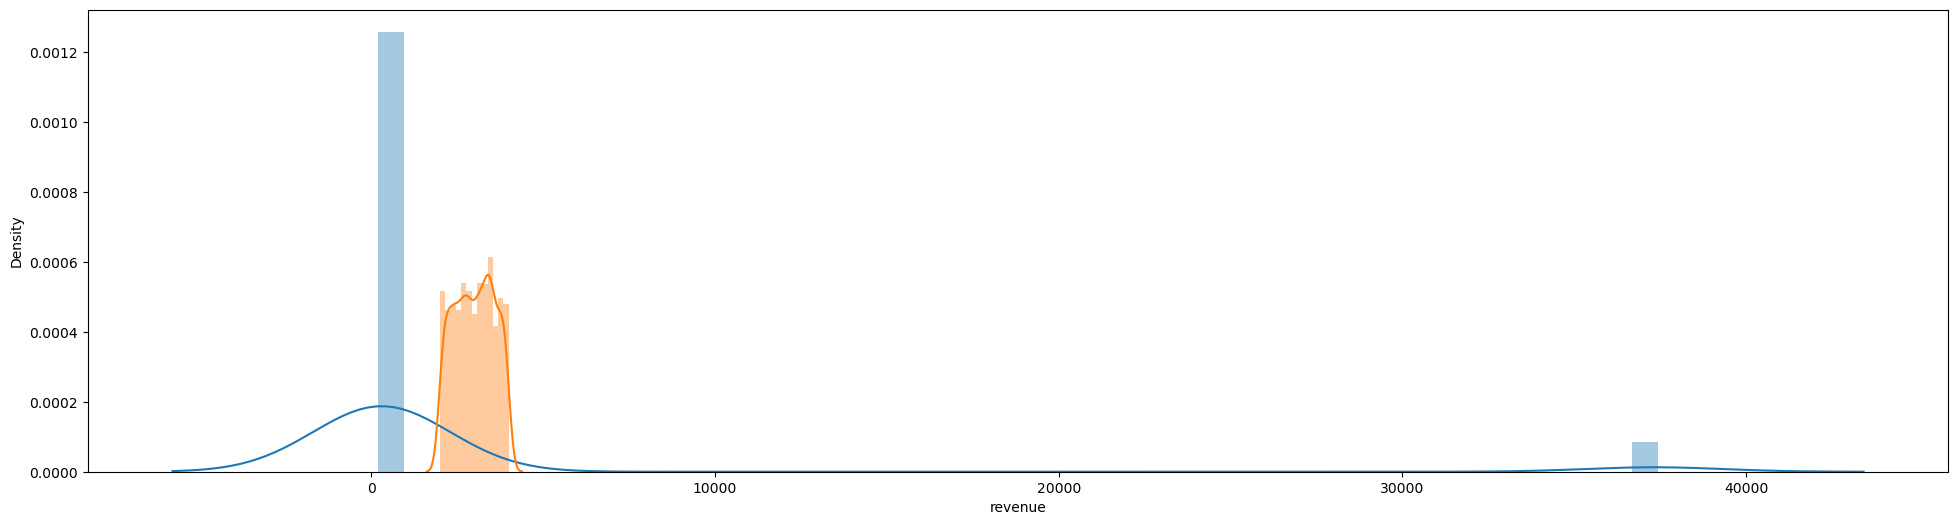

In [57]:
plt.figure(figsize=(24,6))
df_control_oplata = df_AB_oplata[df_AB_oplata.testgroup == 'a']
df_test_oplata = df_AB_oplata[df_AB_oplata.testgroup == 'b']
sns.distplot(df_control_oplata.revenue)
sns.distplot(df_test_oplata.revenue)

<Axes: xlabel='revenue', ylabel='testgroup'>

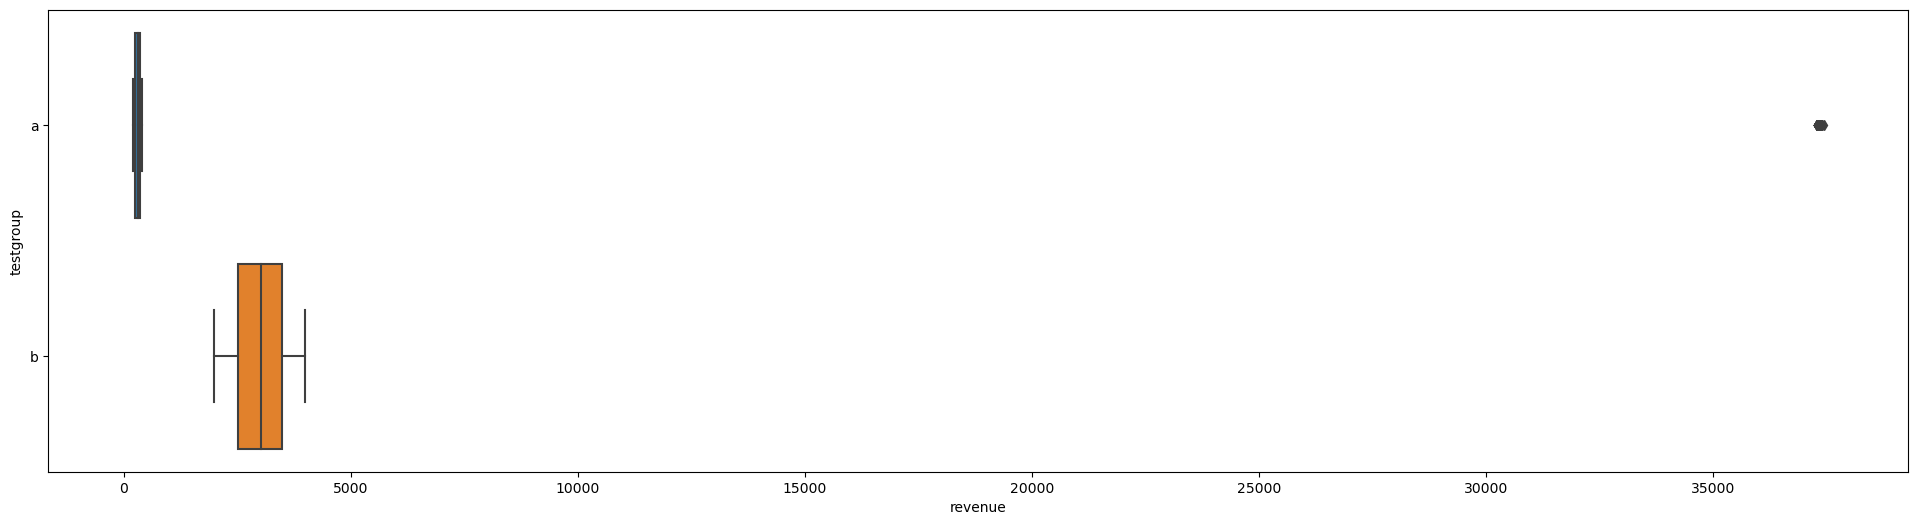

In [58]:
plt.figure(figsize=(24,6))
sns.boxplot(x='revenue', y='testgroup', data=df_AB_oplata)

In [59]:
df_control_oplata.revenue.mean()
#—Å—Ä–µ–¥–Ω–µ–µ –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ

2663.9984439834025

In [60]:
df_test_oplata.revenue.mean()
#—Å—Ä–µ–¥–Ω–µ–µ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ

3003.6581717451522

In [61]:
# –ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –≤–∏–¥–Ω–æ, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ. 
df_control_oplata.query('revenue > 35000')

user_id  revenue testgroup  oplata
416         417    37324         a       1
4428       4429    37304         a       1
5777       5778    37315         a       1
8065       8066    37307         a       1
8743       8744    37334         a       1
...         ...      ...       ...     ...
360696   360697    37347         a       1
378668   378669    37297         a       1
389341   389342    37298         a       1
394580   394581    37302         a       1
399294   399295    37321         a       1

[123 rows x 4 columns]

123 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å –≥—Ä–æ–º–∞–¥–Ω—ã–º–∏ –ø–ª–∞—Ç–µ–∂–∞–º–∏ –∏–∑ 1928 –ø–ª–∞—Ç—è—â–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∞ —ç—Ç–æ –±–æ–ª—å—à–µ 6%  <br>
–∏—Ö —è–≤–Ω–æ –Ω–µ —Å—Ç–æ–∏—Ç –∏—Å–∫–ª—é—á–∞—Ç—å <br>

–ü—Ä–æ–≤–µ—Ä–∏–º –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ —É—Å–ª–æ–≤–∏–π –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å <br>
–í–æ–æ–±—â–µ –¥–ª—è –≤—ã–±–æ—Ä–æ–∫ —Ç–∞–∫–∏—Ö –æ–≥—Ä–æ–º–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤ –º—ã –Ω–µ –æ–±—è–∑–∞–Ω—ã —ç—Ç–æ –¥–µ–ª–∞—Ç—å <br>
–û–±—ã—á–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ç–µ—Å—Ç–∏—Ä—É—é—Ç —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ (scipy.stats.shapiro()), 
–æ–¥–Ω–∞–∫–æ –Ω–∞ –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —ç—Ç–æ—Ç —Ç–µ—Å—Ç —Å–ª–∏—à–∫–æ–º —Ä—å—è–Ω–æ –Ω–∞—Ö–æ–¥–∏—Ç –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏! <br>
–ü–æ—ç—Ç–æ–º—É —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ñ—É–Ω–∫—Ü–∏—é scipy.stats.normaltest() - –æ–Ω–∞ –±–æ–ª—å—à–µ –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–∞ –∫ –±–æ–ª—å—à–∏–º –≤—ã–±–æ—Ä–∫–∞–º:<br>
–Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ ùêª0: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ<br>
–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ ùêª1: –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ 

In [62]:
stats.shapiro(df_control_oplata.revenue)

ShapiroResult(statistic=0.2667924165725708, pvalue=0.0)

In [63]:
stats.shapiro(df_test_oplata.revenue)

ShapiroResult(statistic=0.9583134651184082, pvalue=2.4929213770979496e-22)

In [64]:
stats.normaltest(df_control_oplata.revenue)

NormaltestResult(statistic=1394.9457843086925, pvalue=1.2341605505935488e-303)

In [65]:
stats.normaltest(df_test_oplata.revenue)

NormaltestResult(statistic=1068.8600084412267, pvalue=7.943249488371762e-233)

In [66]:
# –¢–∞–∫–∂–µ –º–æ–∂–µ—Ç–µ —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ —á–µ—Ä–µ–∑ –ø–∞–∫–µ—Ç pingouin.
pg.normality(data=df_AB_oplata, dv="revenue", 
                   group="testgroup", method="normaltest")

W           pval  normal
testgroup                                    
a          1394.945784  1.234161e-303   False
b          1068.860008  7.943249e-233   False

<div class="alert-success"> E—Å–ª–∏ p-value –º–µ–Ω—å—à–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (–æ–±—ã—á–Ω–æ 0.05), 
—Ç–æ –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ. <br>
–ê –≤ –Ω–∞—à–∏—Ö —Ç–µ—Å—Ç–∞—Ö –æ–Ω–æ –Ω–∞–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ, –∑–Ω–∞—á–∏—Ç <strong>—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ.</strong></div>

### –ö–∞–∫–æ–π —Ç–µ—Å—Ç –±—É–¥–µ–º –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –≤ –≥—Ä—É–ø–ø–∞—Ö


–î–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –æ–±—ã—á–Ω–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç T-—Ç–µ—Å—Ç<br>
–ù–æ –¥–ª—è –Ω–µ–≥–æ –≤–∞–∂–Ω—ã–π –≤–æ–ø—Ä–æ—Å ‚Äî —ç—Ç–æ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø –ø—Ä–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ t-—Ç–µ—Å—Ç–∞. <br>
–í–æ –º–Ω–æ–≥–∏—Ö —É—á–µ–±–Ω–∏–∫–∞—Ö –º–æ–∂–Ω–æ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å –¥–æ–≤–æ–ª—å–Ω–æ –∂–µ—Å—Ç–∫–æ–µ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö –ø–æ –ø—Ä–∏—á–∏–Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ –∑–∞–≤—ã—à–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ I —Ä–æ–¥–∞. <br>
NB! –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ t-—Ç–µ—Å—Ç –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –∏ –ø—Ä–∏ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–∞ –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö –∏ –µ—Å–ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç –∑–∞–º–µ—Ç–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤. –û–¥–Ω–∞–∫–æ –ø—Ä–∏ —ç—Ç–æ–º –≤—ã –≤—ã—Ö–æ–¥–∏—Ç–µ –Ω–∞ –æ—á–µ–Ω—å —Ç–æ–Ω–∫–∏–π –ª—ë–¥ ‚Äî –ø–µ—Ä–µ–¥ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º t-—Ç–µ—Å—Ç–∞ –Ω–∞ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–≤–∞–∂–¥—ã –ø–æ–¥—É–º–∞–π—Ç–µ, –Ω–∞—Å–∫–æ–ª—å–∫–æ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ —Å—Ä–µ–¥–Ω–µ–µ –æ—Ç—Ä–∞–∂–∞–µ—Ç —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ. –í–æ–∑–º–æ–∂–Ω–æ, –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –∏–ª–∏ –±—É—Ç—Å—Ç—Ä–∞–ø –æ–∫–∞–∂—É—Ç—Å—è –ª—É—á—à–µ –∏ –∞–¥–µ–∫–≤–∞—Ç–Ω–µ–µ
<br><br>
–ï—Å–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–æ–≥ ‚Äì U-–∫—Ä–∏—Ç–µ—Ä–∏–π –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏.<br>
–≠—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –º–µ–Ω–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –∏ –Ω–∞–ª–∏—á–∏—é –≤—ã–±—Ä–æ—Å–æ–≤.<br>
–ù–û –í–ê–ñ–ù–û! –≠—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–µ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç —Å—Ä–µ–¥–Ω–∏–µ. <br>
–ú–∞–Ω–Ω-–£–∏—Ç–Ω–∏ –Ω–µ –º–æ–∂–µ—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∏—á–µ–≥–æ, –∫—Ä–æ–º–µ —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π. <br>
–≠—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –∏–ª–∏ –º–µ–¥–∏–∞–Ω.
<br><br>
–¢–∞–∫–∂–µ  –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ —É –Ω–∞—Å —Å–ª–∞–±–æ —É–≤–µ–ª–∏—á–∏–ª–∞—Å—å –º–µ—Ç—Ä–∏–∫–∞ —É –º–µ–ª–∫–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –Ω–æ —Å–∏–ª—å–Ω–æ —É–º–µ–Ω—å—à–∏–ª–∞—Å—å —É –∫—Ä—É–ø–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (—á—Ç–æ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–µ –Ω–∞ –Ω–∞—à–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è), —ç—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π (–º–∞–Ω–Ω–∞-—É–∏—Ç–Ω–∏) –ª–µ–≥–∫–æ –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –Ω–∞—Å –∫ –ª–æ–∂–Ω–æ–º—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É.<br>
–ï—â–µ —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ–≤–∞–ª—Å—è –ø—Ä–∏ –≤—ã–±–æ—Ä–µ –∫—Ä–∏—Ç–µ—Ä–∏—è —Å—Ç–∞—Ç—å–µ–π https://habr.com/ru/companies/avito/articles/571094/#t-test<br><br>
<div class="alert-success">–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¢-—Ç–µ—Å—Ç <br>
            –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ —Ç–∞–∫–∂–µ –±—É–¥–µ–º –µ—â–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±—É—Ç—Å—Ç—Ä–∞–ø</div>

–ì–∏–ø–æ—Ç–µ–∑—ã:<br>
H0 ‚Äì  –Ω–∏–∫–∞–∫–æ–≥–æ —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –Ω–µ—Ç<br>
H1 ‚Äì —Å—Ä–µ–¥–Ω–∏–µ –Ω–µ —Ä–∞–≤–Ω—ã (–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞)

#### ARPU

##### –ø—Ä–æ–≤–µ—Ä–∏–º —Å –ø–æ–º–æ—â—å—é –¢-—Ç–µ—Å—Ç–∞

In [67]:
ttest_ind(df_control.revenue, \
          df_test.revenue)

TtestResult(statistic=-0.6242026493616787, pvalue=0.532494858971837, df=404768.0)

pvalue –±–æ–ª—å—à–µ 0.05 –∑–Ω–∞—á–∏—Ç –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –º—ã –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω–µ –º–æ–∂–µ–º <br>
—Ç.–µ. —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ–≥–æ —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É —Å—Ä–µ–¥–Ω–∏–º–∏ –Ω–µ—Ç

##### –±—É—Ç—Å—Ç—Ä–∞–ø

In [70]:
#bootstrap((df_control.revenue, ), np.mean, n_resamples=1000) 
# –ø–æ–ª—É—á–∞–µ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —á–µ—Ä–µ–∑ bootstrap –¥–ª—è —Å—Ä–µ–¥–Ω–∏—Ö –∏–∑ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã

In [71]:
#bootstrap((df_test.revenue, ), np.mean, n_resamples=1000) 
# –ø–æ–ª—É—á–∞–µ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —á–µ—Ä–µ–∑ bootstrap –¥–ª—è —Å—Ä–µ–¥–Ω–∏—Ö —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø—ã

In [72]:
# –∏ —Ç–∞–∫–∂–µ –µ—â–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —á–µ—Ä–µ–∑ –ø–∏–Ω–≥–≤–∏–Ω
pg.compute_bootci(df_control.revenue, func='mean', method="percentile", n_boot=1000)

array([21.43, 29.57])

In [73]:
pg.compute_bootci(df_test.revenue, func='mean', method="percentile", n_boot=1000)

array([25.57, 28.08])

–≤ –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –≤–∏–¥–Ω–æ, —á—Ç–æ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è, <br>
–∑–Ω–∞—á–∏—Ç –º—ã –Ω–µ –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö

In [74]:
# –¢.–∫. –±—É—Ç—Å—Ç—Ä–∞–ø—É –ø–æ—Ö–æ–∂–µ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –ø–∞–º—è—Ç–∏ –¥–ª—è –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ 
# (—è —É–∂–µ –∏ –∫–æ–ª-–≤–æ —Å–∏–º—É–ª—è—Ü–∏–π —É–º–µ–Ω—å—à–∞–ª, –Ω–æ —É –º–µ–Ω—è –≤—Å–µ —Ä–∞–≤–Ω–æ —Ä–∞–∑ —á–µ—Ä–µ–∑ —Ä–∞–∑ —Ä–∞–±–æ—Ç–∞–µ—Ç)
# —Ç–æ –µ—â–µ –º–æ–∂–Ω–æ —Å–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å –≤—Ä—É—á–Ω—É—é
# –ß—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 5% 
# –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å 95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏. <br> 
# –ï—Å–ª–∏ –Ω–æ–ª—å –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤–Ω–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞, —Ç–æ –æ—Ç–ª–∏—á–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã, –∏–Ω–∞—á–µ –Ω–µ—Ç.

# —Ç—É—Ç –º—ã —Å—á–∏—Ç–∞–µ–º —Ä–∞–∑–Ω–∏—Ü—É —Å—Ä–µ–¥–Ω–∏—Ö
mean_diff_arpu = []
for i in range(10000):
    sample_data_control = df_control.sample(frac=1, replace=True)
    sample_mean_control = sample_data_control.revenue.mean()
    
    sample_data_test = df_test.sample(frac=1, replace=True)
    sample_mean_test = sample_data_test.revenue.mean()
    
    sample_mean_diff = sample_mean_test - sample_mean_control
    mean_diff_arpu.append(sample_mean_diff)

In [75]:
pd.Series(mean_diff_arpu).quantile(0.975)

5.4040810069102525

In [76]:
pd.Series(mean_diff_arpu).quantile(0.025)

-2.952287916866076

—Ç.–∫. –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É –Ω–∞—Å —Å–æ–¥–µ—Ä–∂–∏—Ç 0 <br>
—Ç–æ –º—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º—ã—Ö –æ—Ç–ª–∏—á–∏–π –Ω–µ—Ç

#### ARPPU

##### –ø—Ä–æ–≤–µ—Ä–∏–º —Å –ø–æ–º–æ—â—å—é –¢-—Ç–µ—Å—Ç–∞

In [77]:
ttest_ind(df_control_oplata.revenue, \
          df_test_oplata.revenue)

TtestResult(statistic=-1.5917100176862005, pvalue=0.11153459157259496, df=3731.0)

pvalue –±–æ–ª—å—à–µ 0.05 –∑–Ω–∞—á–∏—Ç –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –º—ã –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω–µ –º–æ–∂–µ–º <br>
—Ç.–µ. —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ–≥–æ —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É —Å—Ä–µ–¥–Ω–∏–º–∏ –Ω–µ—Ç 

##### –±—É—Ç—Å—Ç—Ä–∞–ø

In [78]:
#bootstrap((df_control_oplata.revenue, ), np.mean,  n_resamples=1000) 
# –ø–æ–ª—É—á–∞–µ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —á–µ—Ä–µ–∑ bootstrap –¥–ª—è –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã

In [79]:
#bootstrap((df_test_oplata.revenue, ), np.mean,  n_resamples=1000) 
# –ø–æ–ª—É—á–∞–µ–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —á–µ—Ä–µ–∑ bootstrap –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø—ã

In [80]:
# –∏ —Ç–∞–∫–∂–µ –µ—â–µ —á–µ—Ä–µ–∑ –ø–∏–Ω–≥–≤–∏–Ω
pg.compute_bootci(df_control_oplata.revenue, func='mean', method="percentile", n_boot=1000)

array([2278.73, 3050.72])

In [81]:
pg.compute_bootci(df_test_oplata.revenue, func='mean', method="percentile", n_boot=1000)

array([2977.68, 3028.17])

–≤ –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –≤–∏–¥–Ω–æ, —á—Ç–æ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è, <br>
–∑–Ω–∞—á–∏—Ç –º—ã –Ω–µ –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö

In [82]:
# –û–ø—è—Ç—å —Å–º–æ–¥–µ–ª–∏—Ä—É–µ–º –≤—Ä—É—á–Ω—É—é (–µ—Å–ª–∏ –±—É—Ç—Å—Ä–∞–ø –Ω–µ –±—É–¥–µ—Ç –æ—Ç—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å)
# —Å—á–∏—Ç–∞–µ–º —Ä–∞–∑–Ω–∏—Ü—É —Å—Ä–µ–¥–Ω–∏—Ö
mean_diff_arppu = []
for i in range(10000):
    sample_data_control = df_control_oplata.sample(frac=1, replace=True)
    sample_mean_control = sample_data_control.revenue.mean()
    
    sample_data_test = df_test_oplata.sample(frac=1, replace=True)
    sample_mean_test = sample_data_test.revenue.mean()
    
    sample_mean_diff = sample_mean_test - sample_mean_control
    mean_diff_arppu.append(sample_mean_diff)

In [83]:
pd.Series(mean_diff_arppu).quantile(0.975)

742.1372483218581

In [84]:
pd.Series(mean_diff_arppu).quantile(0.025)

-77.10514385610499

—Ç.–∫. –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É –Ω–∞—Å —Å–æ–¥–µ—Ä–∂–∏—Ç 0
—Ç–æ –º—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º—ã—Ö –æ—Ç–ª–∏—á–∏–π –Ω–µ—Ç

In [85]:
# –î–ª—è ARPPU –ø—Ä–æ–≤–µ–¥–µ–º –µ—â–µ –æ–¥–∏–Ω —Ç–µ—Å—Ç, —Å—Ä–∞–≤–Ω–∏–º –º–µ–¥–∏–∞–Ω—ã –≤ –≥—Ä—É–ø–ø–∞—Ö
# —Å–¥–µ–ª–∞–µ–º —Ä—É—á–Ω—É—é —Å–∏–º—É–ª—è—Ü–∏—é –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –º–µ–¥–∏–∞–Ω
median_diff_arppu = []
for i in range(10000):
    sample_data_control = df_control_oplata.sample(frac=1, replace=True)
    sample_median_control = sample_data_control.revenue.median()
    
    sample_data_test = df_test_oplata.sample(frac=1, replace=True)
    sample_median_test = sample_data_test.revenue.median()
    
    sample_mean_diff = sample_median_test - sample_median_control
    median_diff_arppu.append(sample_mean_diff)

In [86]:
pd.Series(median_diff_arppu).quantile(0.975)

2760.0

In [87]:
pd.Series(median_diff_arppu).quantile(0.025)

2658.0

—Ç.–∫. –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –º–µ–¥–∏–∞–Ω —É –Ω–∞—Å –ù–ï —Å–æ–¥–µ—Ä–∂–∏—Ç 0 <br>
—Ç–æ –º—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –∏–º–µ—é—Ç—Å—è —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º—ã–µ –æ—Ç–ª–∏—á–∏—è <br>
–∏ –º—ã –º–æ–∂–µ–º –æ—Ç–≤–µ—Ä–≥—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –º–µ–¥–∏–∞–Ω

# –í—ã–≤–æ–¥—ã 

<div class="alert alert-block alert-success">
–ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –∞–Ω–∞–ª–∏–∑–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ A/B —Ç–µ—Å—Ç–∞ –Ω–µ–ª—å–∑—è 100% —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ –Ω–∞–±–æ—Ä –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –≤ –∫–∞–∫–æ–π-—Ç–æ –∏–∑ –≥—Ä—É–ø–ø –ª—É—á—à–µ <br>
–í –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ –∫–æ–Ω–≤–µ—Ä—Å–∏—è —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º–æ –ª—É—á—à–µ, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º <br>
–≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ –ª—É—á—à–µ —Å—Ä–µ–¥–Ω–∏–π –¥–æ—Ö–æ–¥ ARPU –∏ ARPPU, –Ω–æ —ç—Ç–∏ –æ—Ç–ª–∏—á–∏—è –ù–ï —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º—ã <br>
–ù–æ —Å—Ç–∞—Ç –∑–Ω–∞—á–∏–º—ã –æ—Ç–ª–∏—á–∏—è –¥–ª—è –º–µ–¥–∏–∞–Ω –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–∞—Ö    
<div>

–Ω–∞ –º–æ–π –≤–∑–≥–ª—è–¥ —Å—Ç–æ–∏—Ç –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, —á—Ç–æ –ø—Ä–∏–≤–µ–ª–æ (–∫–∞–∫–æ–µ-—Ç–æ –æ–¥–Ω–æ –∏–∑ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö  –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π?) –∫ –≤—ã–±—Ä–æ—Å–∞–º –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ –∏ –ø–æ—á–µ–º—É –æ–Ω–∏ –∏—Å—á–µ–∑–ª–∏ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≥—Ä—É–ø–ø–µ <br>
p.s. –≤–ø–æ–ª–Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ, —á—Ç–æ —ç—Ç–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –∏–º–µ–µ—Ç —Ä–µ—à–∞—é—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ

# –ó–ê–î–ê–ù–ò–ï 3

<div class="alert alert-info">
–í –∏–≥—Ä–µ Plants & Gardens –∫–∞–∂–¥—ã–π –º–µ—Å—è—Ü –ø—Ä–æ–≤–æ–¥—è—Ç—Å—è —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ —Å–æ–±—ã—Ç–∏—è, –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏. <br>
    –í –Ω–∏—Ö –∏–≥—Ä–æ–∫–∏ –º–æ–≥—É—Ç –ø–æ–ª—É—á–∏—Ç—å —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥–º–µ—Ç—ã –¥–ª—è —Å–∞–¥–∞ –∏ –ø–µ—Ä—Å–æ–Ω–∞–∂–µ–π, –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–æ–Ω–µ—Ç—ã –∏–ª–∏ –±–æ–Ω—É—Å—ã. <br>
    –î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –Ω–∞–≥—Ä–∞–¥—ã —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø—Ä–æ–π—Ç–∏ —Ä—è–¥ —É—Ä–æ–≤–Ω–µ–π –∑–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–µ –≤—Ä–µ–º—è. <br>
    –° –ø–æ–º–æ—â—å—é –∫–∞–∫–∏—Ö –º–µ—Ç—Ä–∏–∫ –º–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø—Ä–æ—à–µ–¥—à–µ–≥–æ —Å–æ–±—ã—Ç–∏—è?<br>

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, –≤ –¥—Ä—É–≥–æ–º —Å–æ–±—ã—Ç–∏–∏ –º—ã —É—Å–ª–æ–∂–Ω–∏–ª–∏ –º–µ—Ö–∞–Ω–∏–∫—É —Å–æ–±—ã—Ç–∏–π —Ç–∞–∫, —á—Ç–æ –ø—Ä–∏ –∫–∞–∂–¥–æ–π –Ω–µ—É–¥–∞—á–Ω–æ–π –ø–æ–ø—ã—Ç–∫–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —É—Ä–æ–≤–Ω—è –∏–≥—Ä–æ–∫ –±—É–¥–µ—Ç –æ—Ç–∫–∞—Ç—ã–≤–∞—Ç—å—Å—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —É—Ä–æ–≤–Ω–µ–π –Ω–∞–∑–∞–¥. <br>
    –ò–∑–º–µ–Ω–∏—Ç—Å—è –ª–∏ –Ω–∞–±–æ—Ä –º–µ—Ç—Ä–∏–∫ –æ—Ü–µ–Ω–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞? –ï—Å–ª–∏ –¥–∞, —Ç–æ –∫–∞–∫?<br>
    </div>

<div class="alert alert-success">
    
**1 –≤–∞—Ä–∏–∞–Ω—Ç** <br>
**–î–Ω–µ–≤–Ω–∞—è –∞—É–¥–∏—Ç–æ—Ä–∏—è (DAU)** ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞—à–ª–∏ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –≤ —Ç–µ—á–µ–Ω–∏–µ —Å—É—Ç–æ–∫.<br>
–°—Ä–∞–≤–Ω–∏—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤–æ –≤—Ä–µ–º—è —Å–æ–±—ã—Ç–∏—è –∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –∫–æ–≥–¥–∞ —Å–æ–±—ã—Ç–∏—è –Ω–µ –±—ã–ª–æ.<br><br>
    
**–ú–µ—Å—è—á–Ω–∞—è –∞—É–¥–∏—Ç–æ—Ä–∏—è (MAU)** ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞—à–ª–∏ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –≤ —Ç–µ—á–µ–Ω–∏–µ –º–µ—Å—è—Ü–∞. 
–°—Ä–∞–≤–Ω–∏—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∑–∞ –º–µ—Å—è—Ü —Å –¥–∞–Ω–Ω—ã–º —Å–æ–±—ã—Ç–∏–µ–º –∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤ –º–µ—Å—è—Ü–∞ —Å –¥—Ä—É–≥–∏–º–∏ —Å–æ–±—ã—Ç–∏—è–º–∏.<br><br>
    
**avg. DAU/MAU = stickness ratio** ‚Äî –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ç–æ–≥–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ —á–∞—Å—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏, –≤–æ –≤—Ä–µ–º—è —Å–æ–±—ã—Ç–∏—è "–æ—Å—Ç–∞—é—Ç—Å—è" –≤ –ø—Ä–æ–¥—É–∫—Ç–µ<br>
–¢.–µ. –Ω–∞—Å–∫–æ–ª—å–∫–æ —á–∞—â–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≤–æ –≤—Ä–µ–º—è —Å–æ–±—ã—Ç–∏—è –∑–∞—Ö–æ–¥—è—Ç –≤ –∏–≥—Ä—É<br><br>
    
**–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ–≤—ã—Ö/–≤–µ—Ä–Ω—É–≤—à–∏—Ö—Å—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π** ‚Äî —á–∏—Å–ª–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤–æ –≤—Ä–µ–º—è –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è —Å–æ–±—ã—Ç–∏—è.<br>
**Retention rate (RR)** ‚Äî –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —É–¥–µ—Ä–∂–∞–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤. <br>
–¢—É—Ç —Å—Ç–æ–∏—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –∏–≥—Ä–æ–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–∞–≤–Ω–æ –Ω–µ –∑–∞—Ö–æ–¥–∏–ª–∏ –≤ –∏–≥—Ä—É –∏ –≤–µ—Ä–Ω—É–ª–∏—Å—å "–ø–æ–¥ —Å–æ–±—ã—Ç–∏–µ"<br><br>
    
**–ö–æ–Ω–≤–µ—Ä—Å–∏—è (conversion rate, CR)** ‚Äî –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —á–∏—Å–ª–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã–ø–æ–ª–Ω–∏–ª–∏ –∫–∞–∫–æ–µ-–ª–∏–±–æ —Ü–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ –∫ –æ–±—â–µ–º—É —á–∏—Å–ª—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.<br>
–¢—É—Ç –ø–æ–¥ —Ü–µ–ª–µ–≤—ã–º –¥–µ–π—Å—Ç–≤–∏–µ–º –º–æ–∂–µ—Ç –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞—Ç—å—Å—è –∞–Ω–ø—Ä–∏–º–µ—Ä –ø–æ–∫—É–ø–∫–∞ —á–µ–≥–æ-—Ç–æ –≤ –∏–≥—Ä–µ (–∂–∏–∑–Ω–µ–π/–ø–ª—é—à–µ–∫ –∏ —Ç.–ø., –Ω–µ –º–æ–≥—É —Ç–æ—á–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —Ç.–∫. –≤ –∏–≥—Ä—É –Ω–µ –∏–≥—Ä–∞–ª)<br><br>
**ARPPU (Average revenue per paying user)** - –°—Ä–µ–¥–Ω–∏–π –¥–æ—Ö–æ–¥ –Ω–∞ –ø–ª–∞—Ç—è—â–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è (—Ç–æ –µ—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–∞).<br><br>
**ARPU (Average revenue per user)** - C—Ä–µ–¥–Ω–∏–π –¥–æ—Ö–æ–¥ —Å –ø—Ä–∏–≤–ª–µ—á—ë–Ω–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.<br><br>
<br><br>    
**2 –≤–∞—Ä–∏–∞–Ω—Ç** <br>
–ö –≤—ã—à–µ–ø–µ—Ä–µ—á–∏—Å–ª–µ–Ω–Ω—ã–º –∏–∑ 1 –≤–∞—Ä–∏–∞–Ω—Ç–∞ —Å—Ç–æ–∏—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞:<br> <br>
**–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–≤–∞–ª–∏–≤—à–∏—Ö—Å—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π**  –≤–æ –≤—Ä–µ–º—è –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è —Å–æ–±—ã—Ç–∏—è.<br>
**Churn rate (–æ—Ç—Ç–æ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤)** ‚Äî –º–µ—Ç—Ä–∏–∫–∞, –æ–±—Ä–∞—Ç–Ω–∞—è retention. <br><br>
**–°—Ä–µ–¥–Ω—è—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–µ—Å—Å–∏–∏ (average session length, ASL)**    <br><br>
–¢–∞–∫–∂–µ –≤–æ–∑–º–æ–∂–Ω–æ —Å–∏–ª—å–Ω–æ –∏–∑–º–µ–Ω—è—Ç—å—Å—è –º–µ—Ç—Ä–∏–∫–∏ stickness ratio, –∫–æ–Ω–≤–µ—Ä—Å–∏—è, ARPPU –∏ ARPU, –Ω–æ —Å–ª–æ–∂–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –≤ –∫–∞–∫—É—é —Å—Ç–æ—Ä–æ–Ω—É 
</div>